In [62]:
import pandas as pd
import nltk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emmaobrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
df = pd.read_csv("full_cleaned_data.csv")
df

,Unnamed: 0,Name,Street,Price Tags,Average Rating,Review text,Category 1,Category 2,Customer Satisfaction
0,0,THE FARMHOUSE TAP & GRILL,Bank St,2.0,4.0,julie another wonderful experience farmhouse! ...,burgers,tradamerica,High
1,1,HEN OF THE WOOD,NaN,3.0,4.5,"cozy interior, fresh (we saw farmer drop stack...",newamerican,NaN,High
2,2,THE GRYPHON,Main St,2.0,4.5,"best brunch. bloody mary'#39's die for, love u...",nightlife,newamerican,High
3,3,JUNIPER BAR & RESTAURANT,Cherry St,2.0,4.0,met family crazy thanksgiving weekend. great p...,tradamerica,NaN,High
4,4,HONEY ROAD,Church St,2.0,4.5,review mentioned difficult get reservation res...,NaN,NaN,High
...,...,...,...,...,...,...,...,...,...
105,105,KRU COFFEE,Church St,1.0,4.5,stopped last day struggling decide grab coffee...,coffee,sandwiche,High
106,106,HALVORSON’S UPSTREET CAFE,Church St,2.0,3.0,great food. cozy atmosphere. made reservations...,tradamerica,beer_and_wine,Low
107,107,PIESANOS,Main St,2.0,3.0,"1 1/2 hour delivery wait...i get it, it'#39's ...",pizza,italian,Low
108,108,KESTREL COFFEE ROASTERS,Maple St,NaN,4.5,sweet little roastery free short term streetsi...,cafes,coffee,High


In [64]:
df['Price Tags'].value_counts()

2.0    53
1.0    21
3.0     8
4.0     1
Name: Price Tags, dtype: int64

In [65]:
df['Street'].value_counts()

Church St         16
Main St            9
Pine St            8
College St         6
N Winooski Ave     6
Riverside Ave      4
Cherry St          4
Saint Paul St      4
Battery St         3
Pearl St           3
Colchester Ave     3
Bank St            3
North Ave          3
Center St          3
North St           2
Lake St            2
Maple St           2
Shelburne Rd       2
S Union St         1
Lawson Ln          1
Flynn Ave          1
Tracy Dr           1
N Ave              1
N St               1
Oak St             1
Institute Rd       1
Henry St           1
South Union St     1
Mechanics Ln       1
S Champlain St     1
N Champlain St     1
Name: Street, dtype: int64

In [66]:
df['Average Rating'].unique()

array([4. , 4.5, 5. , 3.5, 3. , 2.5])

In [67]:
df['Category 1'].unique()

array(['burgers', 'newamerican', 'nightlife', 'tradamerica', nan,
       'breakfast_brunch', 'vegetaria', 'indpak', 'pizza', 'italian',
       'tha', 'cafes', 'sush', 'sandwiche', 'seafoo', 'delis', 'coffee',
       'foodstands', 'cocktailbars', 'himalayan', 'noodles', 'mexican',
       'juicebars', 'sala', 'chinese'], dtype=object)

In [68]:
# Clean Reviews 
df['Review text'] = df['Review text'].str.replace(';', '\'')
df['Review text'] = df['Review text'].str.replace('<br&gt;', '')
df['Review text'] = df['Review text'].str.replace('&', '')
df['Review text'] = df['Review text'].str.replace('amp;', '')
df['Review text'] = df['Review text'].str.replace('  ', ' ')
df['Review text'] = df['Review text'].str.replace('#39\'', ' ')

# Make all lowercase
df['Review text'] = df['Review text'].apply(str.lower)

# Add custom stop words
custom_stop_words = ['food', 'burlington', 'would', '-', 'place', 'got', 'also', 'get', 'it\'', '\'s', '\'t', '\'ve' ]
stop = stop + custom_stop_words

In [69]:
# Filter out stop words store in new collumn
df['Review_without_stopwords'] = df['Review text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['Review_without_stopwords']
# Get 100 most common words
word_freq = pd.Series(' '.join(df['Review_without_stopwords']).lower().split()).value_counts()[:10]

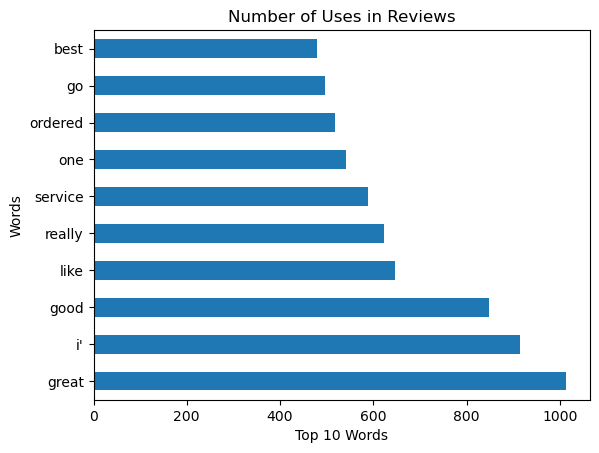

In [70]:
# Plot of word frequencies
ax = word_freq.plot(kind='barh')
ax.set_ylabel("Words")
ax.set_xlabel("Top 10 Words")
ax.set_title("Number of Uses in Reviews");

In [71]:
## Finding the actual value counts of each column 
#(everything isn't duplicated 30 times for each restaurant)
names_seen = []
actual_price_tags = []
actual_avg_ratings = []
actual_streets = []
actual_categories = []
for i in range(0, len(df['Name'])):
    if df['Name'][i] not in names_seen:
        names_seen.append(df['Name'][i])
        actual_price_tags.append(df['Price Tags'][i])
        actual_avg_ratings.append(df['Average Rating'][i])
        actual_streets.append(df['Street'][i])
        actual_categories.append(df['Category'][i])

KeyError: 'Category'

Text(0.5, 1.0, 'Distribution of restaurant ratings in Burlington VT')

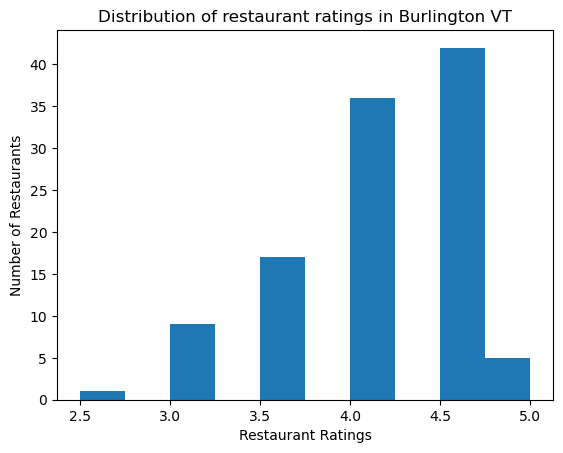

In [72]:
#distribution of average restaurant ratings in Burlington
#Most restaurants in Burlington have 4.5 or 4 stars. 

plt.hist(df['Average Rating'])
plt.xlabel('Restaurant Ratings') 
plt.ylabel('Number of Restaurants') 
  
# displaying the title
plt.title("Distribution of restaurant ratings in Burlington VT")

Text(0.5, 1.0, 'Distribution of how much restaurants charge in Burlington VT')

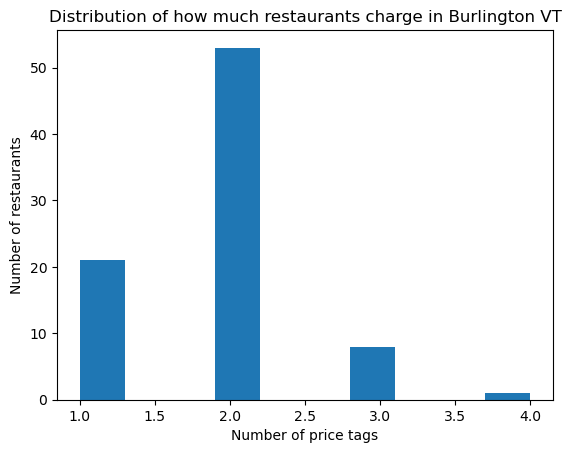

In [73]:
##PRICE TAGS##

#distribution of prices restaurants charge in Burlington
#Most restaurants have two price tags ($$) and barely any restaurants charge 4 price tags ($$$$)

plt.hist(df['Price Tags'])
plt.xlabel('Number of price tags') 
plt.ylabel('Number of restaurants') 
  
# displaying the title
plt.title("Distribution of how much restaurants charge in Burlington VT")

Text(0, 0.5, 'Average Rating')

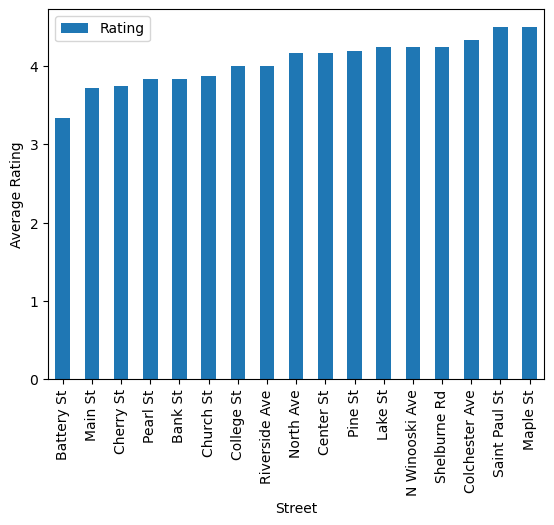

In [74]:
# Average Review by Street
street_rating_df = pd.DataFrame(
    {'Street': df['Street'],
     'Rating': df['Average Rating']
     
    })

street_rating_ave = street_rating_df.groupby('Street').mean()
street_rating_ave['Restraunts'] = street_rating_df.groupby('Street').count()['Rating']
street_rating_ave = street_rating_ave.drop(street_rating_ave[street_rating_ave.Restraunts < 2].index)
street_rating_ave = street_rating_ave.drop(street_rating_ave.index[12])

ax = street_rating_ave.sort_values(by=['Rating']).plot(y = "Rating", kind="bar")
ax.set_ylabel("Average Rating")


Text(0, 0.5, 'Average Rating')

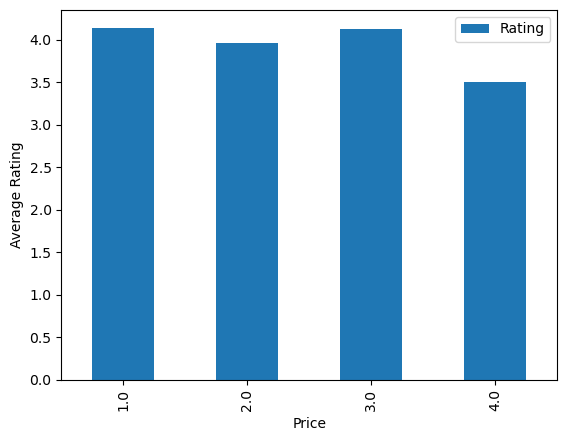

In [82]:
#Price and rating
price_rating_df = pd.DataFrame(
    {'Price': df['Price Tags'],
     'Rating': df['Average Rating']
     
    })
price_rating_df = price_rating_df.groupby('Price').mean()


ax = price_rating_df.sort_values(by=['Price']).plot(y = "Rating", kind="bar")
ax.set_ylabel("Average Rating")


In [83]:
#Highest and Lowest Rated in Burlington
names = df['Name'].tolist()

ave_rating_df = pd.DataFrame(
    {'Name': df['Name'],
     'Rating': df['Average Rating']
     
    })

ave_rating_df.sort_values(by=['Rating']).head(10)

,Name,Rating
92,THE MOUNTED CAT,2.5
109,NECTAR’S,3.0
81,GAKU RAMEN,3.0
37,RÍ RÁ,3.0
94,EL GATO CANTINA,3.0
95,PIZZERIA IDA,3.0
90,THREE NEEDS TAPROOM & BREWERY,3.0
47,SPLASH AT THE BOATHOUSE,3.0
107,PIESANOS,3.0
106,HALVORSON’S UPSTREET CAFE,3.0


In [50]:
def select_columns(data, *columns):
 
    """Select only columns passed as arguments."""

    return data.loc[:, columns]
def process_data(data):
 
    # Transform Data, Select Features

    data = select_columns(data,'Street','Category', 'Price Tags', 'Average Rating', 'Review')


    # Return predictors and response variables separately

    X = data.drop(['Average Rating'], axis = 1)
    y = data.loc[:, 'Average Rating']


    return X, y

In [89]:
##CUT OF VALUE FOR GOOD/VS BAD RATING == 4.5 STARS (4.5 < is bad)

from sklearn.model_selection import train_test_split
data = df.copy()
data['Customer Satisfaction Level'] = data['Average Rating'].replace([3.0, 3.5, 4.0], 'High')
data['Customer Satisfaction Level'] = data['Customer Satisfaction Level'].replace( [4.5, 5], 'Low')

full_data = data
train, val = train_test_split(data, train_size=.8, random_state=42)

X_train, y_train = process_data(train)
X_val, y_val = process_data(val)

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=stop,max_features=100) # SOLUTION NO PROMPT
X_train = vectorizer.fit_transform(train["Review"]) # SOLUTION
Y_train = train["Overall"] # SOLUTION
train_vocab = vectorizer.get_feature_names_out() # SOLUTION

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1000) # SOLUTION
model.fit(X_train,Y_train) # SOLUTION NO PROMPT
training_accuracy = model.score(X_train,Y_train) # SOLUTION
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.6411327762302693


In [92]:
val_vectorizer = CountVectorizer(vocabulary=train_vocab) # SOLUTION
X_val = val_vectorizer.fit_transform(val["Review"]) # SOLUTION
Y_val = val["Overall"] # SOLUTION
val_accuracy = model.score(X_val,Y_val) # SOLUTION
print("Validation Accuracy: ", val_accuracy)

Validation Accuracy:  0.5992578849721707


In [93]:
df_coefs = pd.DataFrame()
df_coefs["feature"] = train_vocab
df_coefs["coef"] = model.coef_[0]
df_coefs.sort_values('coef',inplace=True)
print(df_coefs)

   feature      coef
98   worth -0.424438
59   never -0.372470
68   pizza -0.345116
20  coffee -0.296218
50    like -0.293515
..     ...       ...
81   small  0.343315
55    many  0.363374
74    rice  0.366918
86   sweet  0.444405
39   fresh  0.480912

[100 rows x 2 columns]


In [94]:
top_10_spam = df_coefs['feature'].values[-10:] # SOLUTION
top_10_ham = df_coefs['feature'].values[:10] # SOLUTION
print("Words most associated with good ratings:",top_10_spam)
print("Words most associated with bad ratings:",top_10_ham)

Words most associated with good ratings: ['hot' 'right' 'everything' 'try' 'also' 'small' 'many' 'rice' 'sweet'
 'fresh']
Words most associated with bad ratings: ['worth' 'never' 'pizza' 'coffee' 'like' 'better' 'vermont' 'come'
 'drinks' 'back']


/Users/emmaobrien/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


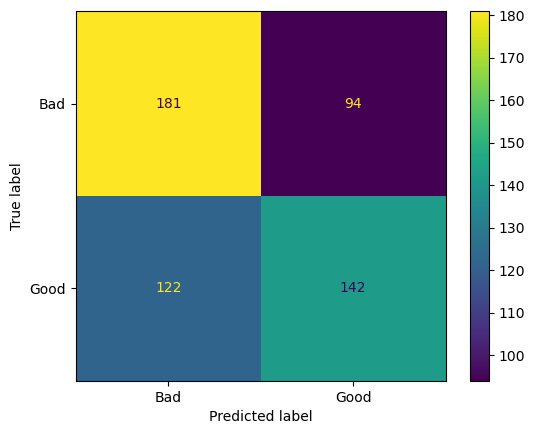

In [96]:
from sklearn.metrics import plot_confusion_matrix # SOLUTION
display = plot_confusion_matrix(model, X_val, Y_val) # SOLUTION